<a href="https://colab.research.google.com/github/Allanx495/Allanx495/blob/main/Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Sales Analysis Project!

###Objective:  To find any interesting insights/trends##

---


###Summary:
- In this project we have done an EDA of an Amazon Sales dataset that was pasted from Kaggle.
- Project findings and file description are at the end of this notebook

















In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/My Drive/Datasets/AmazonSalesData.csv')

df.head()

Mounted at /content/drive


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# Data Cleaning
print(df.shape)
df.isna().any()

(100, 14)


,0
Region,False
Country,False
Item Type,False
Sales Channel,False
Order Priority,False
Order Date,False
Order ID,False
Ship Date,False
Units Sold,False
Unit Price,False


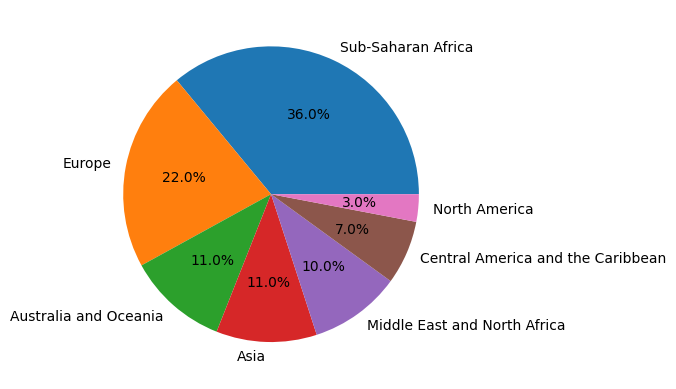

In [ ]:
# Created a pie chart from region column
df['Region'].value_counts()
Region_Name = df['Region'].value_counts().index.tolist()
Region_Name

Value = df['Region'].value_counts().values.tolist()
Value

plt.pie(Value, labels=Region_Name, autopct='%1.1f%%')
plt.show()

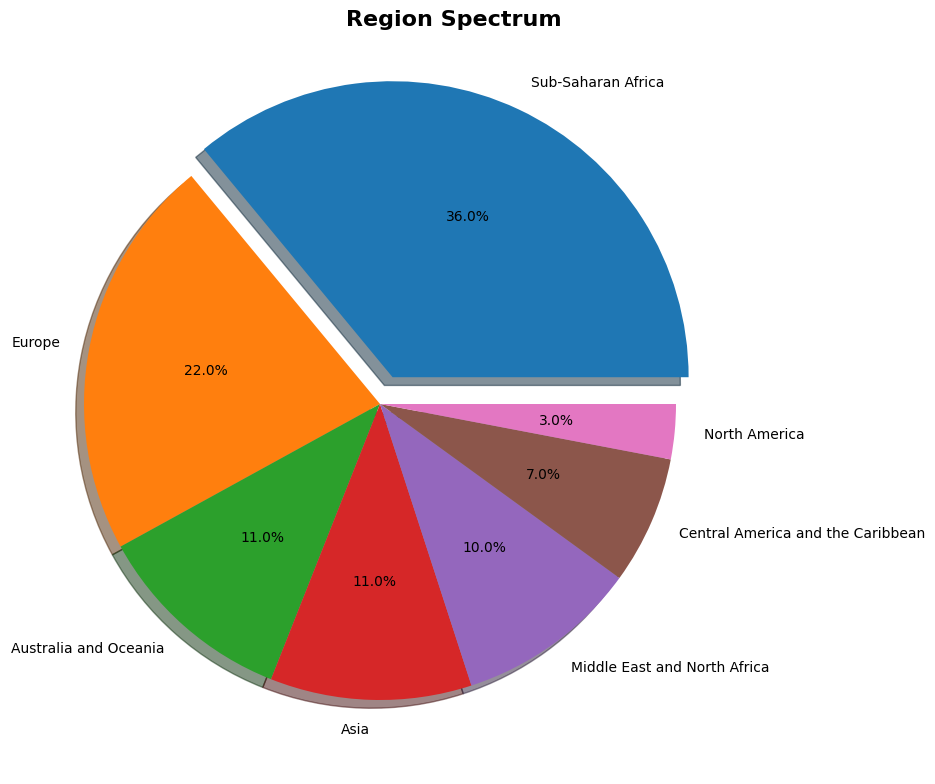

In [ ]:
# Added title and exploding feature
myexplode = [0.1 if country in ['Sub-Saharan Africa'] else 0 for country in Region_Name]
fig = plt.figure(figsize=(10, 10))
plt.pie(Value, labels=Region_Name, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.subplots_adjust(top=0.85)
plt.title('Region Spectrum', fontsize=16, weight='bold', loc='center', x=0.60)
plt.show()

In [ ]:
# Tried to do a pie chart with countries but there were too many values:
df['Country'].value_counts()
Country_Name = df['Country'].value_counts().index.tolist()
Country_Name

Value = df['Country'].value_counts().values.tolist()
Value


[4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

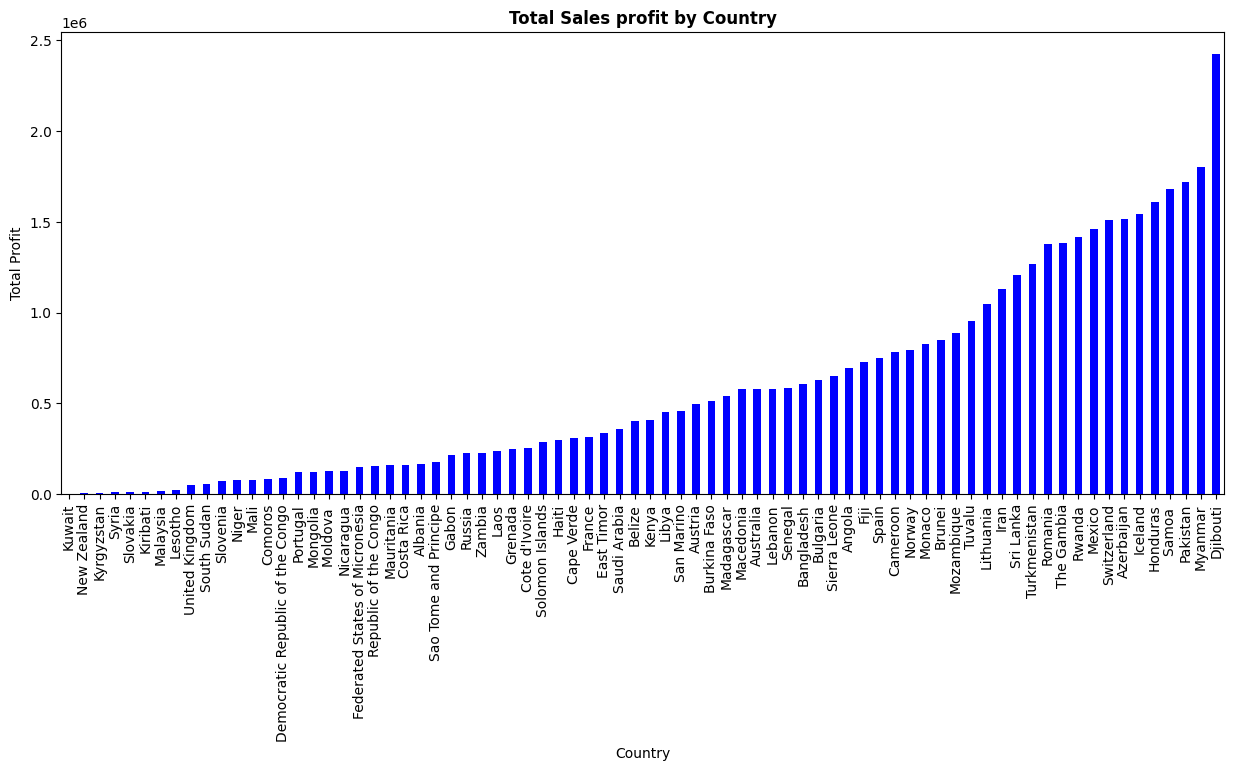

In [ ]:
# Since the Pie chart didnt work, I created a bar chart:
# Bar chart comparing countries and their profits
country_sales = df.groupby('Country')['Total Profit'].sum()

country_sales.sort_values(ascending=True).plot(kind='bar', figsize=(15, 6), color='blue')
plt.title('Total Sales profit by Country', weight='bold')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.show()

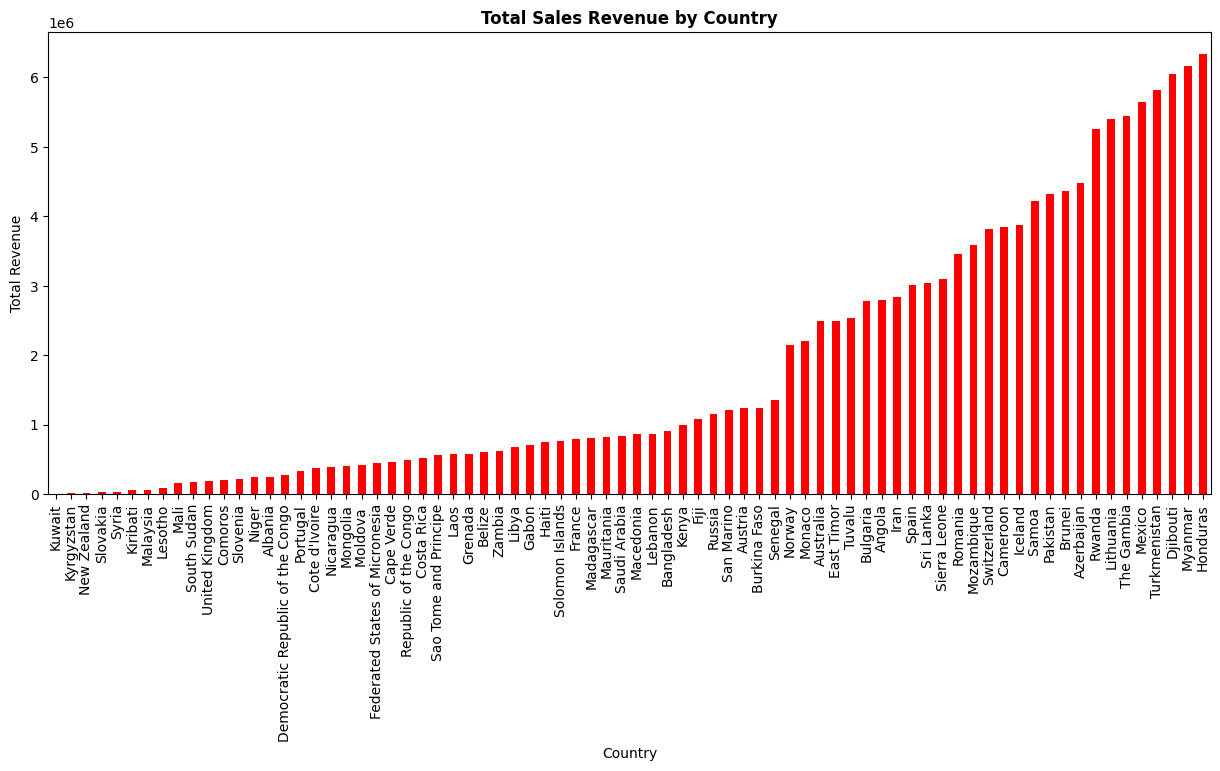

In [ ]:
# Bar chart that compares the countries and their revenue
country_sales = df.groupby('Country')['Total Revenue'].sum()

country_sales.sort_values(ascending=True).plot(kind='bar', figsize=(15, 6), color='red')
plt.title('Total Sales Revenue by Country', weight='bold')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

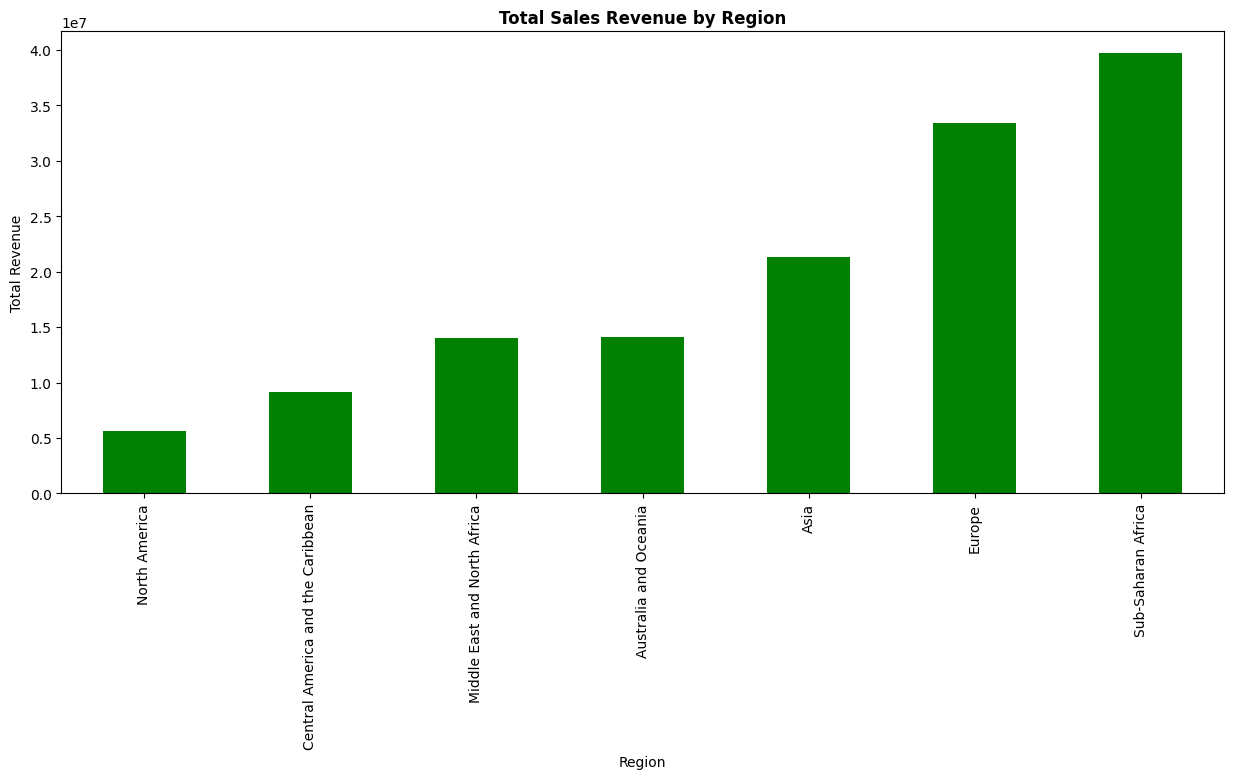

In [ ]:
# Bar chart that compares the total revenue by the region, ascending order
region_sales = df.groupby('Region')['Total Revenue'].sum()

region_sales.sort_values(ascending=True).plot(kind='bar', figsize=(15, 6), color='green')
plt.title('Total Sales Revenue by Region', weight='bold')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

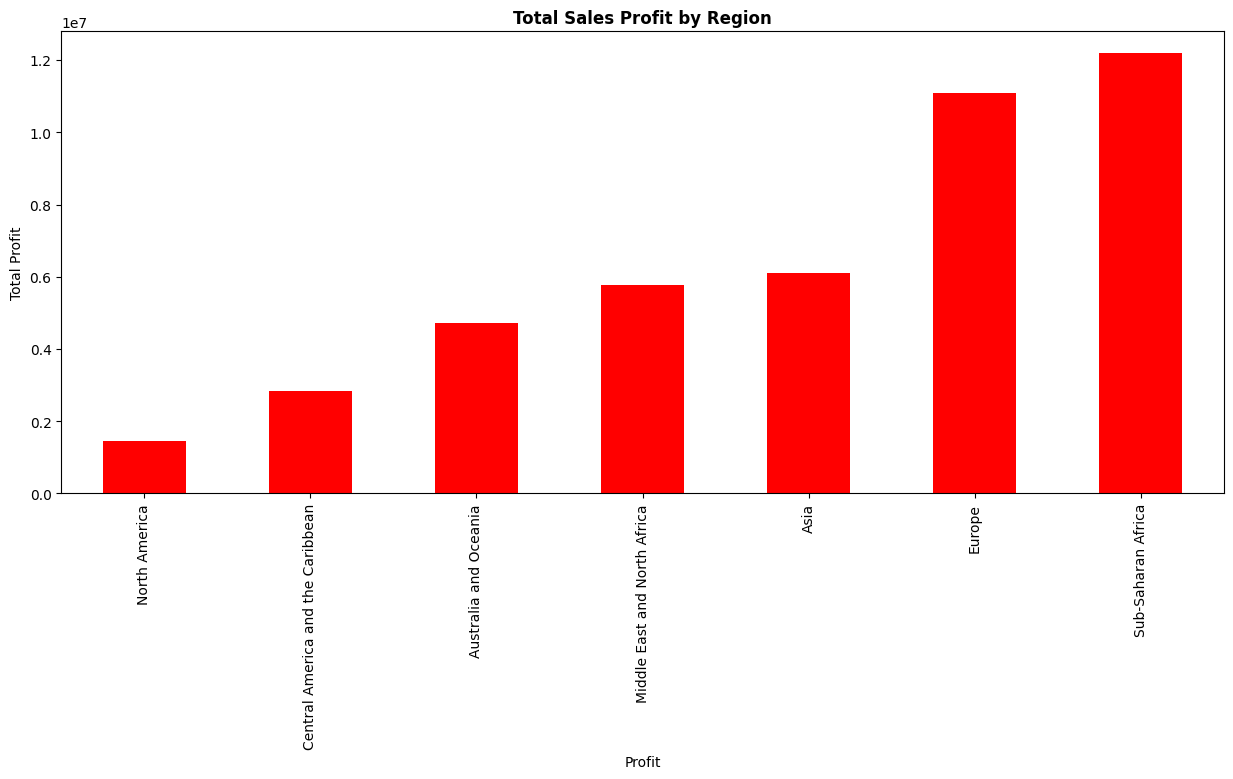

In [ ]:
# Bar Chart (Ascending), that compares total profits by the region
region_sales = df.groupby('Region')['Total Profit'].sum()

region_sales.sort_values(ascending=True).plot(kind='bar', figsize=(15, 6), color='Red')
plt.title('Total Sales Profit by Region', weight='bold')
plt.xlabel('Profit')
plt.ylabel('Total Profit')
plt.show()

In [ ]:
# Bar Chart of profits for each item type
# First group the profits and item types together
profits_by_item_type = df.groupby('Item Type')['Total Profit'].sum().sort_values()

# Convert the Series to DataFrame
profits_by_item_type = profits_by_item_type.reset_index()

# Bar Chart build
fig = px.bar(profits_by_item_type,
             x='Item Type',
             y='Total Profit',
             color='Total Profit',
             color_continuous_scale='oranges',
             category_orders={"Item Type": profits_by_item_type.sort_values(by='Total Profit', ascending=False)['Item Type'].tolist()}
            )

#Title
fig.update_layout(title_text="Total Cumulative Profits per Item Type", title_x=0.5)

# Display the chart
fig.show()

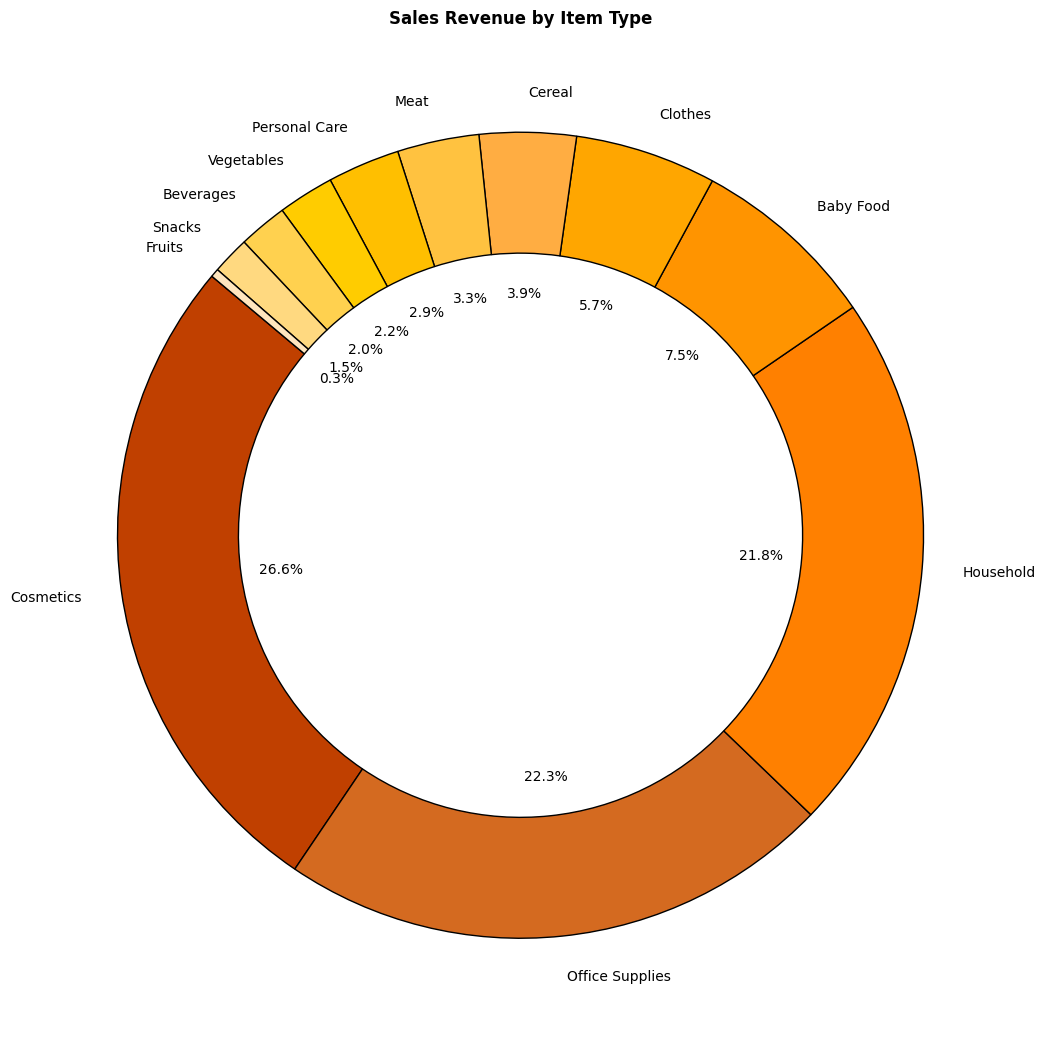

In [ ]:
# Donut Chart for the sales revenue of each item type

# donut chart build
item_sales = df.groupby(['Item Type'])['Total Revenue'].sum()
labels = item_sales.index
sizes = item_sales.values

# Create the dictionary of colors (RGB)
colors = [
    (0.753, 0.251, 0.0, 1.0),    # Mahogany--cosmetics
    (0.831, 0.416, 0.125, 1.0),  # Cinammon -- Office supplies
    (1.0, 0.5, 0.0, 1.0),        # Deep Orange --Household
    (1.0, 0.58, 0.0, 1.0),       # pumpkin Orange -- baby food
    (1.0, 0.65, 0.0, 1.0),       # Safety Orange -- clothes
    (1.0, 0.68, 0.26, 1.0),      # pure Orange --cereal
    (1.0, 0.76, 0.25, 1.0),      # Mango Tango -- vegetables
    (1.0, 0.75, 0.0, 1.0),       # Web Orange -- meat
    (1.0, 0.8, 0.0, 1.0),        # Bright Orange personal care
    (1.0, 0.82, 0.31, 1.0),     # Orange Peel -- beverages
    (1.0, 0.85, 0.5, 1.0),      # Macaroni and Cheese -- snacks
    (1.0, 0.9, 0.75, 1.0)       # Cosmetic Orange - Brighest -- fruits
]


# Sort sizes and labels from largest to smallest
sorted_indices = sorted(range(len(sizes)), key=lambda k: sizes[k], reverse=True)
sizes = [sizes[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

# Chart settings so % align together
plt.figure(figsize=(13, 17))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'width': 0.3})
plt.title('Sales Revenue by Item Type', weight='bold')
plt.show()

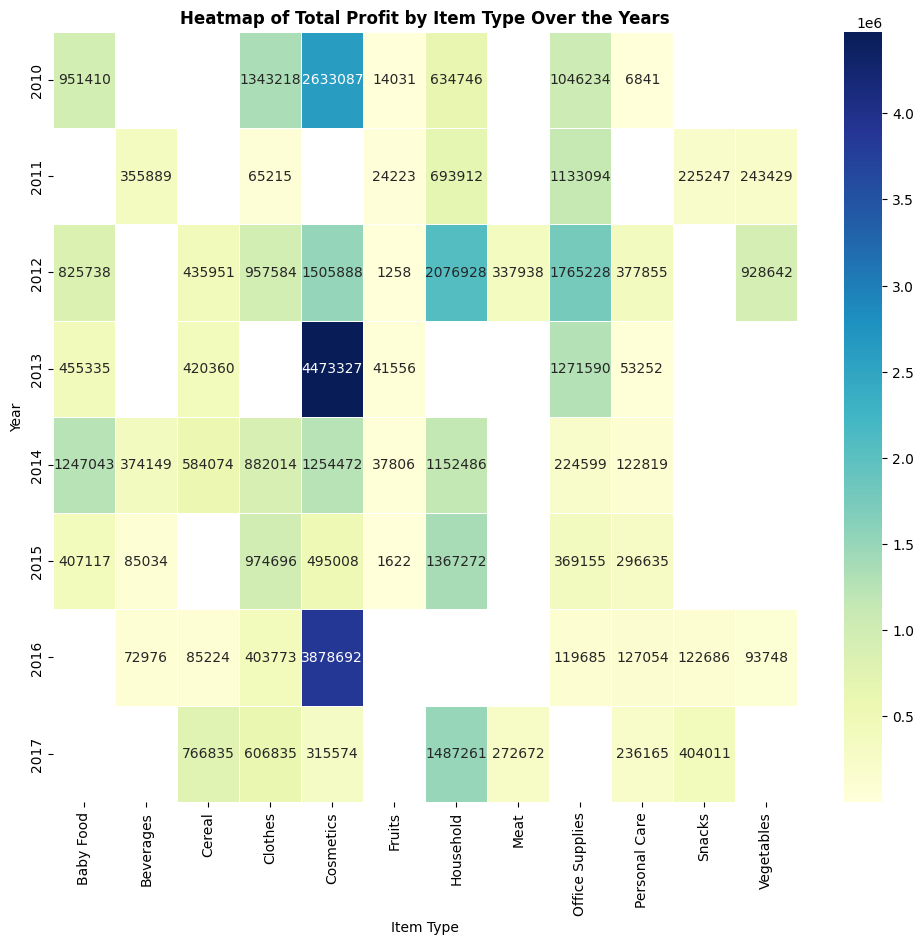

In [ ]:
# Heat Map frequency of profits over the years, for each item type
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
pivot_df = df.pivot_table(index='Year', columns='Item Type', values='Total Profit', aggfunc='sum')


plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Total Profit by Item Type Over the Years', weight='bold')
plt.ylabel('Year')
plt.xlabel('Item Type')
plt.show()

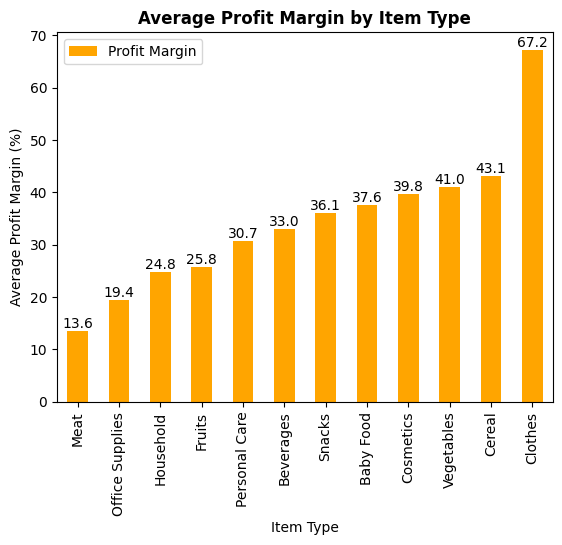

In [ ]:
# Bar Chart for average profit margin
# FYI APM = TP / TR
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100 # Making the profit margin as a percentage
pivot = df.pivot_table(index='Item Type', values='Profit Margin', aggfunc='mean')
pivot = pivot.sort_values(by='Profit Margin', ascending=True)

# Create a bar chart with the 'pivot' DataFrame
ax = pivot.plot(kind='bar', color='orange')
plt.title('Average Profit Margin by Item Type', weight='bold')
plt.xlabel('Item Type')
plt.ylabel('Average Profit Margin (%)')

# Labels
for bar in ax.containers[0]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

plt.show()

In [ ]:
# Why is Clothes so high up?......lets do a deeper analysis and try to find whats going on.

In [ ]:
# First lets gets a list of each item type and their total profit
profits_by_item_type = df.groupby('Item Type')['Total Profit'].sum().sort_values()

# Display each order priority's total profit
print('Order Item types and their total profits:')
print(profits_by_item_type)

Order Item types and their total profits:
Item Type
Fruits               120495.18
Meat                 610610.00
Snacks               751944.18
Beverages            888047.28
Personal Care       1220622.48
Vegetables          1265819.63
Cereal              2292443.43
Baby Food           3886643.70
Clothes             5233334.40
Office Supplies     5929583.75
Household           7412605.71
Cosmetics          14556048.66
Name: Total Profit, dtype: float64


In [ ]:
# Now make a list that retrives item item and their average units sold
units_sold_by_item_type = df.groupby('Item Type')['Units Sold'].mean().sort_values()

# Display each order priority's total units sold. Remember this is in units SOLD, therefore we are not using $
print('Order Item types and their average units sold:')
print(units_sold_by_item_type)

Order Item types and their average units sold:
Item Type
Vegetables         3341.833333
Cereal             3696.714286
Office Supplies    3913.916667
Snacks             4545.666667
Personal Care      4870.800000
Household          4969.666667
Fruits             4999.800000
Meat               5337.500000
Clothes            5481.538462
Baby Food          5792.142857
Cosmetics          6439.846154
Beverages          7088.500000
Name: Units Sold, dtype: float64


In [ ]:
# Now make a list that retreives the avergae unit cost
units_cost_by_item_type = df.groupby('Item Type')['Unit Cost'].mean().sort_values()

# Display each order priority's average units cost.
print('Order Item types and their average units cost:')
print(units_cost_by_item_type)

Order Item types and their average units cost:
Item Type
Fruits               6.92
Beverages           31.79
Clothes             35.84
Personal Care       56.67
Vegetables          90.93
Snacks              97.44
Cereal             117.11
Baby Food          159.42
Cosmetics          263.33
Meat               364.69
Household          502.54
Office Supplies    524.96
Name: Unit Cost, dtype: float64


In [ ]:
# So after a careful analysis we came with the conclusion that the Average Profit Margin Graph is correct (explanation at the bottom of file)

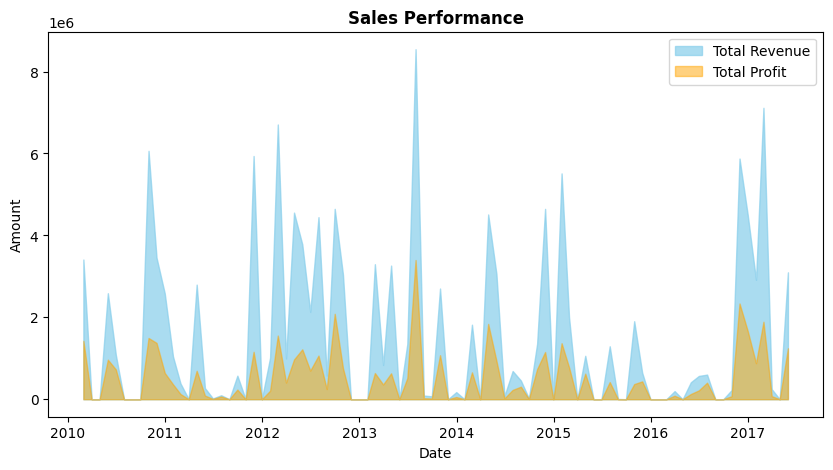

In [ ]:
# Area chart for overall sales performance of the entire company
# Load your data
df = pd.read_csv('/content/drive/My Drive/Datasets/AmazonSalesData.csv')

# Convert 'Order Date' to datetime and set it as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample data by month and sum up the necessary columns
monthly_data = df.resample('M').sum(numeric_only = True)

# Plotting the area chart
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_data.index, monthly_data['Total Revenue'], label='Total Revenue', color='skyblue', alpha=0.7)
plt.fill_between(monthly_data.index, monthly_data['Total Profit'], label='Total Profit', color='orange', alpha=0.5)
plt.title('Sales Performance', weight='bold')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

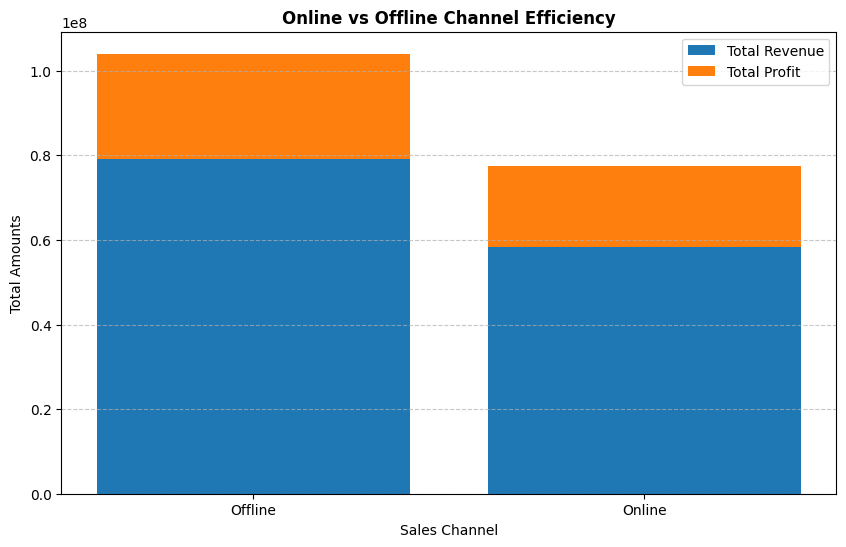

In [ ]:
# Bar Chart for efficiency test of Method for sale: online/offline
channel_data = df.groupby('Sales Channel').agg({'Total Revenue':'sum', 'Total Profit':'sum'})

plt.figure(figsize=(10, 6))
plt.bar(channel_data.index, channel_data['Total Revenue'], label='Total Revenue')
plt.bar(channel_data.index, channel_data['Total Profit'], bottom=channel_data['Total Revenue'], label='Total Profit')
plt.title('Online vs Offline Channel Efficiency', weight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Total Amounts')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Bar chart comparing profits and order priority

# First, Calculate the total profit of entire company
# Use this to see if the next cells calculations are correct
total_profit = df['Total Profit'].sum()
print(f"The total profit for the entire company [Amazon]: ${total_profit}")


The total profit for the entire company [Amazon]: $44168198.39999999


Order Priority types and their counted profits:
Order Priority
C     6748328.46
M     9669542.50
L    10858727.86
H    16891599.58
Name: Total Profit, dtype: float64


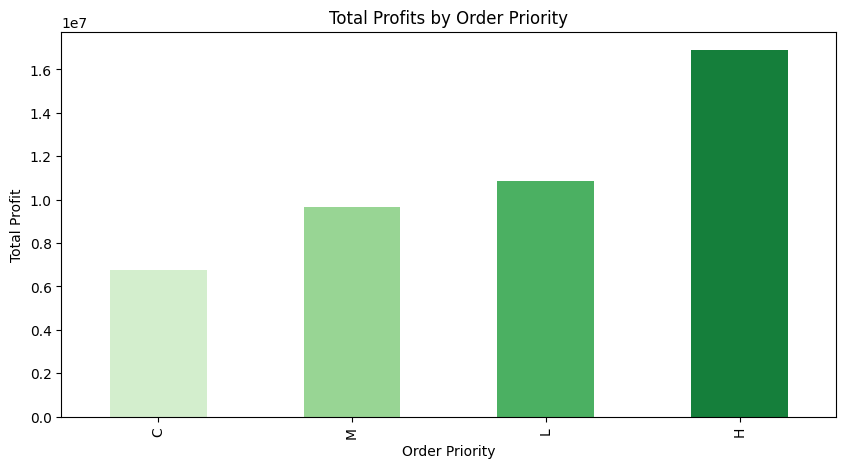

In [ ]:
# Aggregate total profits by 'Order Priority' and sort
profits_by_priority = df.groupby('Order Priority')['Total Profit'].sum().sort_values()

# Display each order priority's total profit
print('Order Priority types and their counted profits:')
print(profits_by_priority)

# Green palette
colors = sns.color_palette("Greens", len(profits_by_priority))

profits_by_priority.plot(kind='bar', figsize=(10, 5), color=colors)
plt.title('Total Profits by Order Priority')
plt.ylabel('Total Profit')
plt.xlabel('Order Priority')
plt.show()

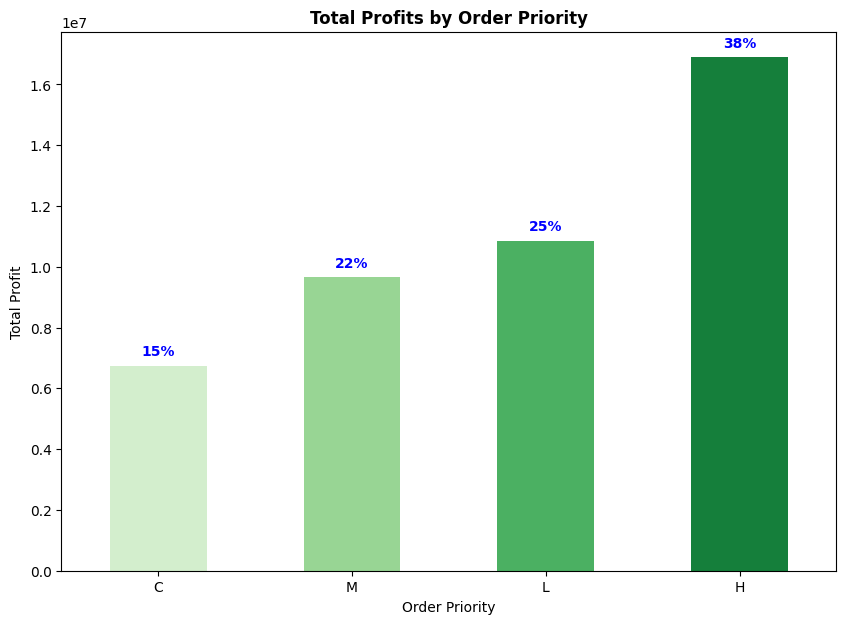

In [ ]:
# Finalzing touches on Chart

# Green palette
colors = sns.color_palette("Greens", len(profits_by_priority))

ax = profits_by_priority.plot(kind='bar', figsize=(10, 7), color=colors, width=0.5)
plt.title('Total Profits by Order Priority', weight='bold')
plt.ylabel('Total Profit')
plt.xlabel('Order Priority')
plt.xticks(rotation=0)

# Calculate the profits
total_profits_sum = profits_by_priority.sum()

# Add (%) for each bar. Blue and rounded.
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_profits_sum:.0f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='blue', fontweight='bold')
plt.show()

#                           Final Project Findings
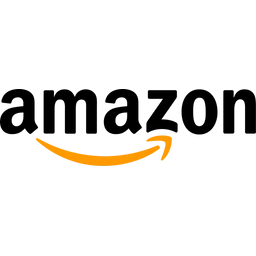   

## 1. Pie Chart Comparing Regions:
###Objective: To find which regions were the least popular and which regions were the most popular.

Findings:

- Least popular:  North America (surprising)
		Accounted for only 3% of sales

- Most popular: Sub-Saharan Africa (surprising)
		Accounted for 36 % of sales

- Europe was the 2nd most popular with a percentage of sales being 22%.

## 2. I tried to do the same kind of chart for the countries column but there were too many countries so I had to change to a bar chart.

## 3. Bar Chart Comparing total profit by each Country:
###Objective: To find which country was the most popular and which one was the least.

Findings:

- Least popular: Kuwait

- Most popular: Djibouti

- Top 5 leading countries: Djibouti, Myanmar, Pakistan, Samoa, Honduras

- Lowest 5 countries: Kuwait, New Zealand, Kyrgyzstan, Syria, Slovakia

## 4. Bar Chart comparing total revenue by each Country:
###Objective: I wanted to see if the results would be the exact same as the previous chart. List Countries in ascending order.

Findings:

- Least popular: Kuwait

- Most popular: Honduras

- Top 5 leading Countries: Honduras, Myanmar, Djibouti, Turkmenistan, Mexico

- Lowest 5 Countries: Kuwait, Kyrgyzstan, New Zealand, Syria, Slovakia

- Summary: Even though the lowest 5 countries were practically the same thing, the top 5 were very different. For instance Mexico is now the top 5 for total revenue and Turkmenistan is now top 4. The country with the number 1 spot (and with the most revenue) is now Honduras which is on a completely different continent!

## 5. Bar Chart comparing total revenue by region:
###Objective:  To find the highest and lowest regions by total revenue. List the countries in ascending order. Green colored bars.

Findings:

- Least popular: North America

- Most popular: Sub-Saharan Africa

- Middle East, North Africa, Australia, and Oceana all have the same Values which means they all have about the same total sales revenue and they are also all tied for the middle spot.


## 6. Bar Chart comparing total profits by region:
###Objective: To see if the chart is the exact same as the one before. Red colored bars

Findings:

- Least popular: North America

- Most popular: Sub-Saharan Africa

- Practically the same exact chart, the 2 middle bars switched but they are still in the middle and since they have the same values practically not much has changed.

## 7. Interactive Bar Chart comparing Item Types and the total profits they each brought in.
###Objective: I wanted to see the entire landscape of total profits within each item type. Make each item type a different color (orange palette).

Findings:

- Most profit: Cosmetics (~$14.5 Million)

- Least profit: Fruits (~$120,000)

- 2nd Highest Item: Household items (~$7.4 M)

- 2nd Lowst Item: Beverages (~$610,000)

## 8. Donut Chart comparing Sales Revenue for each Item Type:
###Objectives: I wanted to see how it would differ from the previous chart

Findings:
Shows the same insights as the previous chart, except some columns switched places. Cosmetics and Fruits didn't change places.

## 9. Heat Map comparing for each item type over the years:
###Objective: To create a map that shows the frequency of profits for each year, separated by item type.

Findings:

- Cosmetics pulled in the most amount of profit during the years 2013 and 2016.
- Besides Office Supplies, Personal Care, and Clothes; most of the item types have a rollercoaster profit stream.
- Some of the years are missing
- 2012 was a great year for most item types except for fruits.
- 2012 was the worst year for fruits

## 10. Bar Chart that compares the average profit margin of each item type
###Objective: Find the Average Profit Margin of each item type. Sort in Ascending order.

Findings:

- Highest: Clothes (67.2%)
- Lowest: Meat (13.6)
- Perhaps the most interesting finding of this dataset is that the leading item type for average profit margin (APM) is actually clothes and that cosmetics is only at number 4 spot for leading APM.
- Cereal is at number 2 spot, followed shortly by vegetables.
- From a business standpoint this is very interesting to find. Why was Cosmetics the leader (by a lot) in total profit but now its Clothes for APM?
Why is the Household column now in the lowest 3?

####These answers are very interesting and so we will have to conduct deeper analysis to figure out everything.


## 11. Code a snippet in which you find the total profits by each item type:
###Objective: To see if the total profits for each item type matches with chart 7.

Findings:
It did ✅



## 12. Code a snippet that finds the average Units Sold for each Item type:
###Objective: Find any insights from this and see if it raises any eyebrows.

Findings:

- Beverages is at the number 1 spot meaning it has the most units sold. Despite it having an incredibly low total profit, the department has sold the most products.
- Vegetables has the lowest units sold
Cereal and Office Supplies follow vegetables in the lowest units sold

## 13. Code a snippet that finds the average Unit Cost for each Item Type:
###Objective: This will be the final step to doing my deep analysis of why average profit margin is higher for some item types if their total profit is relatively lower than others.

Findings:

- Fruits has the lowest unit cost of $6.92
- Office Supplies has the highest unit cost of $524.96
- Clothes is in the lower percentile with a cost of $35.84 while cosmetics is at $263.33
- The reason why Cosmetics was the leader in total profits but not in APM was due to Cosmetics being a high priced item. It also has a much higher unit cost than clothes meaning it is more money for amazon to get it.
- The Cost of Goods Sold (COGS) is significantly lower for clothes when compared to cosmetics.
- While selling clothes is profitable per unit, the overall profit of clothes may be lower than other categories like Cosmetics or Household
- Cosmetics has high profitable-high sales with low profit margins while Clothes is a low total profitable item type with low sales but extremely profitable in the per unit category.
- Even though Cereal doesn't have the best total profit, it is still a very efficient product to sell because it has a great APM. In fact it has the 2nd highest APM.

## 14. Area Chart Comparing Total Revenue and Total Profit over time:
###Objective: To see how well the company did over time.

Findings:

Amazon had peak times during the year of 2013
Whenever they had high revenue streams, the profit seems to lag behind
While they did make a great income, the orange area lags behind the blue area a lot, suggesting that the company may need to evaluate their costs.

## 15. Bar Chart Comparing online vs offline efficiency:
###Objective: To find which method was more efficient

Findings:

Offline sales produced more profit (shocking)
The total revenue for offline sales was surprisingly a lot higher than online.


## 16. Bar Chart Comparing order priority and their total profits:
###Objective: To find which order priority brings in the most profit and which one brings in the least.

Findings:

- H was the highest with a total percentage of 38%
- L was second with 25%
- M was third with 22%
- C was last with a total percentage of 15%





##File Description:


In [1]:
#File Description
#

# Country: The specific country within the region where the sale occurred.

# Item Type: The category of the product sold (e.g., "Baby Food", "Office Supplies").

# Sales Channel: The method of sale, either "Online" or "Offline".

# Order Priority: The priority level assigned to the order (e.g., "H", "C", "L").

# Order Date: The date the order was placed.

# Order ID: A unique identifier for the order.

# Ship Date: The date the order was shipped.

# Units Sold: The quantity of the product sold.

# Unit Price: The selling price per unit of the product.

# Unit Cost: The cost price per unit of the product.

# Total Revenue: The total revenue generated from the sale (Units Sold * Unit Price).

# Total Cost: The total cost incurred for the sale (Units Sold * Unit Cost).

# Total Profit: The total profit made from the sale (Total Revenue - Total Cost).
